In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

# Exploring dataset

## Helper Functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# importing helper function
from helper_functions import create_tensorboard_callback, plot_loss_curves, pred_and_plot, unzip_data, walk_through_dir

--2021-11-11 05:49:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-11-11 05:49:17 (83.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
unzip_data('/content/drive/MyDrive/Datasets/all_food_classes.zip')

In [ ]:
walk_through_dir('all_food_classes')

There are 2 directories and 0 images in 'all_food_classes'.
There are 101 directories and 0 images in 'all_food_classes/train'.
There are 0 directories and 750 images in 'all_food_classes/train/apple_pie'.
There are 0 directories and 750 images in 'all_food_classes/train/sashimi'.
There are 0 directories and 750 images in 'all_food_classes/train/takoyaki'.
There are 0 directories and 750 images in 'all_food_classes/train/onion_rings'.
There are 0 directories and 750 images in 'all_food_classes/train/chocolate_mousse'.
There are 0 directories and 750 images in 'all_food_classes/train/bibimbap'.
There are 0 directories and 750 images in 'all_food_classes/train/chocolate_cake'.
There are 0 directories and 750 images in 'all_food_classes/train/ramen'.
There are 0 directories and 750 images in 'all_food_classes/train/donuts'.
There are 0 directories and 750 images in 'all_food_classes/train/greek_salad'.
There are 0 directories and 750 images in 'all_food_classes/train/hot_and_sour_soup'.
T

## Ploting some random images from training data set

In [ ]:
# getting all calsses name
import pathlib

data_dir = pathlib.Path('all_food_classes/train')
classes = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = classes[0:]
print(class_names)

['apple_pie' 'baby_back_ribs' 'baklava' 'beef_carpaccio' 'beef_tartare'
 'beet_salad' 'beignets' 'bibimbap' 'bread_pudding' 'breakfast_burrito'
 'bruschetta' 'caesar_salad' 'cannoli' 'caprese_salad' 'carrot_cake'
 'ceviche' 'cheese_plate' 'cheesecake' 'chicken_curry'
 'chicken_quesadilla' 'chicken_wings' 'chocolate_cake' 'chocolate_mousse'
 'churros' 'clam_chowder' 'club_sandwich' 'crab_cakes' 'creme_brulee'
 'croque_madame' 'cup_cakes' 'deviled_eggs' 'donuts' 'dumplings' 'edamame'
 'eggs_benedict' 'escargots' 'falafel' 'filet_mignon' 'fish_and_chips'
 'foie_gras' 'french_fries' 'french_onion_soup' 'french_toast'
 'fried_calamari' 'fried_rice' 'frozen_yogurt' 'garlic_bread' 'gnocchi'
 'greek_salad' 'grilled_cheese_sandwich' 'grilled_salmon' 'guacamole'
 'gyoza' 'hamburger' 'hot_and_sour_soup' 'hot_dog' 'huevos_rancheros'
 'hummus' 'ice_cream' 'lasagna' 'lobster_bisque' 'lobster_roll_sandwich'
 'macaroni_and_cheese' 'macarons' 'miso_soup' 'mussels' 'nachos'
 'omelette' 'onion_rings' 'oy

In [ ]:
# function to view random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

def view_random_image(target_dir, target_class):
  # setting up target folder
  target_folder = target_dir+target_class
  print(f"target_folder: {target_folder}")

  # get random image form folder
  random_image = random.sample(os.listdir(target_folder),1)
  print(f"Random Image: {random_image}")

  # Reading image and plotting image
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image Shape: {img.shape}")

  return img

target_folder: all_food_classes/train/garlic_bread
Random Image: ['582056.jpg']
Image Shape: (512, 512, 3)


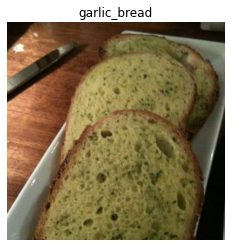

In [ ]:
imag = view_random_image('all_food_classes/train/', random.choice(class_names))

# Data preprocessing and Augmentaation 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = '/content/all_food_classes/train'
test_dir = '/content/all_food_classes/test'

## Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    zoom_range = 0.2,
    rotation_range = 0.2,
    horizontal_flip = True,
    width_shift_range=0.2, 
    height_shift_range=0.2,
)

test_datagen = ImageDataGenerator()

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size= IMG_SIZE,
    class_mode='categorical',
    batch_size= BATCH_SIZE,
    seed = 101,
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size= IMG_SIZE,
    class_mode='categorical',
    batch_size= BATCH_SIZE,
    seed = 101,
)


Found 75750 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


## CallBacks

* EarlyStopping Callback

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

* Model Checkpoint callback

In [ ]:
checkpoint_path = '/content/drive/MyDrive/Datasets/SeeFood_models/EfficientNetB4_1'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True)

# EfficientNetB0 Model

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = True

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers[:-15]:
  layer.trainable = False 

In [ ]:
inputs = layers.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(len(class_names), activation='softmax')(x)

model_b4 = tf.keras.Model(inputs, outputs, name='EfficientNetB4_Model')

In [ ]:
model_b4.summary()

Model: "EfficientNetB4_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 256)               327936    
                                                                 
 dense_5 (Dense)             (None, 101)               25957     
                                                                 
Total params: 4,403,464
Trainable params: 1,262,101
Non-trainable params: 3,141,363
____________________________

In [ ]:
model_b4.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy'],
)

history_b4 = model_b4.fit(
    train_data,
    epochs = 10,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = int(0.15 * len(test_data)),
    callbacks = [
                 early_stopping,
                 model_checkpoint,
    ]
)

Epoch 1/10
2368/2368 [==============================] - ETA: 0s - loss: 2.0691 - accuracy: 0.4839INFO:tensorflow:Assets written to: /content/drive/MyDrive/Datasets/SeeFood_models/EfficientNetB4_1/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


2368/2368 [==============================] - 1311s 551ms/step - loss: 2.0691 - accuracy: 0.4839 - val_loss: 1.4790 - val_accuracy: 0.6041
Epoch 2/10
2368/2368 [==============================] - ETA: 0s - loss: 1.5928 - accuracy: 0.5889INFO:tensorflow:Assets written to: /content/drive/MyDrive/Datasets/SeeFood_models/EfficientNetB4_1/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


2368/2368 [==============================] - 1281s 541ms/step - loss: 1.5928 - accuracy: 0.5889 - val_loss: 1.3080 - val_accuracy: 0.6425
Epoch 3/10
2368/2368 [==============================] - ETA: 0s - loss: 1.4020 - accuracy: 0.6296INFO:tensorflow:Assets written to: /content/drive/MyDrive/Datasets/SeeFood_models/EfficientNetB4_1/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


2368/2368 [==============================] - 1292s 545ms/step - loss: 1.4020 - accuracy: 0.6296 - val_loss: 1.2649 - val_accuracy: 0.6555
Epoch 4/10
2368/2368 [==============================] - ETA: 0s - loss: 1.2714 - accuracy: 0.6610INFO:tensorflow:Assets written to: /content/drive/MyDrive/Datasets/SeeFood_models/EfficientNetB4_1/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


2368/2368 [==============================] - 1294s 546ms/step - loss: 1.2714 - accuracy: 0.6610 - val_loss: 1.2237 - val_accuracy: 0.6671
Epoch 5/10
2368/2368 [==============================] - ETA: 0s - loss: 1.1663 - accuracy: 0.6848INFO:tensorflow:Assets written to: /content/drive/MyDrive/Datasets/SeeFood_models/EfficientNetB4_1/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


2368/2368 [==============================] - 1259s 532ms/step - loss: 1.1663 - accuracy: 0.6848 - val_loss: 1.1089 - val_accuracy: 0.7068
Epoch 6/10
2368/2368 [==============================] - 1173s 495ms/step - loss: 1.0772 - accuracy: 0.7020 - val_loss: 1.1923 - val_accuracy: 0.6851
Epoch 7/10
2368/2368 [==============================] - 1208s 510ms/step - loss: 0.9934 - accuracy: 0.7239 - val_loss: 1.1726 - val_accuracy: 0.6970
Epoch 8/10
2368/2368 [==============================] - 1169s 494ms/step - loss: 0.9342 - accuracy: 0.7378 - val_loss: 1.1597 - val_accuracy: 0.6909
Epoch 9/10
2368/2368 [==============================] - 1193s 504ms/step - loss: 0.8738 - accuracy: 0.7529 - val_loss: 1.2539 - val_accuracy: 0.6761
Epoch 10/10
2368/2368 [==============================] - 1189s 502ms/step - loss: 0.8196 - accuracy: 0.7645 - val_loss: 1.2693 - val_accuracy: 0.6883


In [ ]:
!zip -r /content/EfficientNetB4_1.zip /content/drive/MyDrive/Datasets/SeeFood_models/EfficientNetB4_1

  adding: content/drive/MyDrive/Datasets/SeeFood_models/EfficientNetB4_1/ (stored 0%)
  adding: content/drive/MyDrive/Datasets/SeeFood_models/EfficientNetB4_1/variables/ (stored 0%)
  adding: content/drive/MyDrive/Datasets/SeeFood_models/EfficientNetB4_1/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/drive/MyDrive/Datasets/SeeFood_models/EfficientNetB4_1/variables/variables.index (deflated 74%)
  adding: content/drive/MyDrive/Datasets/SeeFood_models/EfficientNetB4_1/assets/ (stored 0%)
  adding: content/drive/MyDrive/Datasets/SeeFood_models/EfficientNetB4_1/saved_model.pb (deflated 91%)
  adding: content/drive/MyDrive/Datasets/SeeFood_models/EfficientNetB4_1/keras_metadata.pb (deflated 96%)


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/SeeFood_models/EfficientNetB4_1')

In [ ]:
model.save('SeeFood_V1')

INFO:tensorflow:Assets written to: SeeFood_V1/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [ ]:
model.evaluate(test_data)

790/790 [==============================] - 152s 190ms/step - loss: 1.1408 - accuracy: 0.6887


[1.1407508850097656, 0.6887128949165344]

In [ ]:
model.save('SeeFood_Model.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
model_1 = tf.keras.models.load_model('SeeFood_V1')

In [ ]:
model_1.evaluate(test_data)

790/790 [==============================] - 147s 184ms/step - loss: 1.1407 - accuracy: 0.6887


[1.1407499313354492, 0.6887128949165344]

In [ ]:
tf.saved_model.save(model_1, 'Saved_Model')

INFO:tensorflow:Assets written to: Saved_Model/assets


INFO:tensorflow:Assets written to: Saved_Model/assets


# Converting Model to TfLite Mmodel

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/SeeFood_models/EfficientNetB4_1')
model.save('SeeFood_v1')

INFO:tensorflow:Assets written to: SeeFood_v1/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('SeeFood_v1')
tflite_model = converter.convert()

open("model_v1.tflite", "wb").write(tflite_model)

17465092

## Optimizing Model 

* makeing it smaller

In [ ]:
optimize="Speed"
if optimize=='Speed':
    converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]
elif optimize=='Storage':
     converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
else:    
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
#reduce the size of a floating point model by quantizing the weights to float16
converter.target_spec.supported_types = [tf.float16]
tflite_quant_model = converter.convert()
#save the quanitized model toa binary file
open("Seefood_model_v1.tflite", "wb").write(tflite_quant_model)

8824464

## Loading Model

In [ ]:
import cv2
# Read the image and decode to a tensor
image_path='/content/all_food_classes/test/apple_pie/101251.jpg' 
img = cv2.imread(image_path)
img = cv2.resize(img,(224,224))
img_show = img/255.

In [ ]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path='/content/Seefood_model_v1.tflite')
#allocate the tensors
interpreter.allocate_tensors()

input_tensor= np.array(np.expand_dims(img,0), dtype=np.float32)
input_index = interpreter.get_input_details()[0]["index"]

# setting input tensor
interpreter.set_tensor(input_index, input_tensor)

#Run the inference
interpreter.invoke()
output_details = interpreter.get_output_details()

# output data of image
output_data = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
output_details

[{'dtype': numpy.float32,
  'index': 494,
  'name': 'StatefulPartitionedCall:0',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([  1, 101], dtype=int32),
  'shape_signature': array([ -1, 101], dtype=int32),
  'sparsity_parameters': {}}]

In [ ]:
output_data.argmax(), output_data.shape

(21, (1, 101))

## I Dont Know what is this

In [ ]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_quant_model)
#allocate the tensors
interpreter.allocate_tensors()

In [ ]:
#get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.get_input_details()[0]

{'dtype': numpy.float32,
 'index': 0,
 'name': 'serving_default_input_4:0',
 'quantization': (0.0, 0),
 'quantization_parameters': {'quantized_dimension': 0,
  'scales': array([], dtype=float32),
  'zero_points': array([], dtype=int32)},
 'shape': array([  1, 224, 224,   3], dtype=int32),
 'shape_signature': array([ -1, 224, 224,   3], dtype=int32),
 'sparsity_parameters': {}}

In [ ]:
import cv2
# Read the image and decode to a tensor
image_path='/content/all_food_classes/test/apple_pie/101251.jpg' 
img = cv2.imread(image_path)
img = cv2.resize(img,(224,224))
#Preprocess the image to required size and cast
input_shape = input_details[0]['shape']
input_tensor= np.array(np.expand_dims(img,0), dtype=np.float32)

In [ ]:
#set the tensor to point to the input data to be inferred
input_index = interpreter.get_input_details()[0]["index"]
interpreter.set_tensor(input_index, input_tensor)
#Run the inference
interpreter.invoke()
output_details = interpreter.get_output_details()

In [ ]:
output_data = interpreter.get_tensor(output_details[0]['index'])
results = np.squeeze(output_data)
top_k = results.argsort()
# for label, idx in train_datagen.class_indices.items():  
#     if top_k[idx]==1:
#         print(f"Prediction: {label}")

In [ ]:
class_names[output_data.argmax()]

'chocolate_cake'

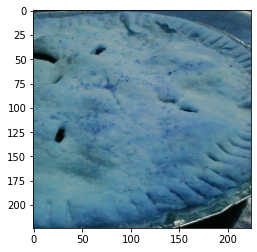

In [ ]:
plt.imshow(img)

In [ ]:
x = tf.round(output_data)

In [ ]:
tf.argmax(x, axis=1)

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([21])>

## Functions to make predictions

In [ ]:
def model_pred(model_path, img, classes):
  # Load TFLite model and allocate tensors.
  interpreter = tf.lite.Interpreter(model_path='/content/Seefood_model_v1.tflite')
  #allocate the tensors
  interpreter.allocate_tensors()

  input_tensor= np.array(np.expand_dims(img,0), dtype=np.float32)
  input_index = interpreter.get_input_details()[0]["index"]

  # setting input tensor
  interpreter.set_tensor(input_index, input_tensor)

  #Run the inference
  interpreter.invoke()
  output_details = interpreter.get_output_details()

  # output data of image
  output_data = interpreter.get_tensor(output_details[0]['index'])

  pred = output_data.argmax()

  food_name = classes[pred]

  return food_name

In [ ]:
import tensorflow as tf
import cv2

def view_and_predict(target_dir, target_class, model_path):
  # setting up target folder
  target_folder = target_dir+target_class

  # get random image form folder
  random_image = random.sample(os.listdir(target_folder),1)
  print(f"Random Image: {random_image}")

  # Reading image and plotting image
  img = tf.io.read_file(target_folder + '/' + random_image[0])
  img = tf.io.decode_image(img)
  img = tf.image.resize(img,(224,224))
  img_show = img/255.

  pred = model_pred(model_path, img, class_names)

  plt.imshow(img_show)
  plt.title(f"Real Label: {target_class},   prediction: {pred}")
  plt.axis('off');

  return img

Random Image: ['366278.jpg']


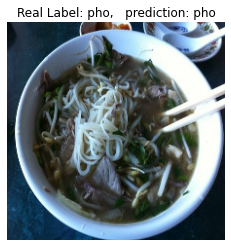

In [ ]:
imag = view_and_predict('all_food_classes/test/', random.choice(class_names), '/content/Seefood_model_v1.tflite')